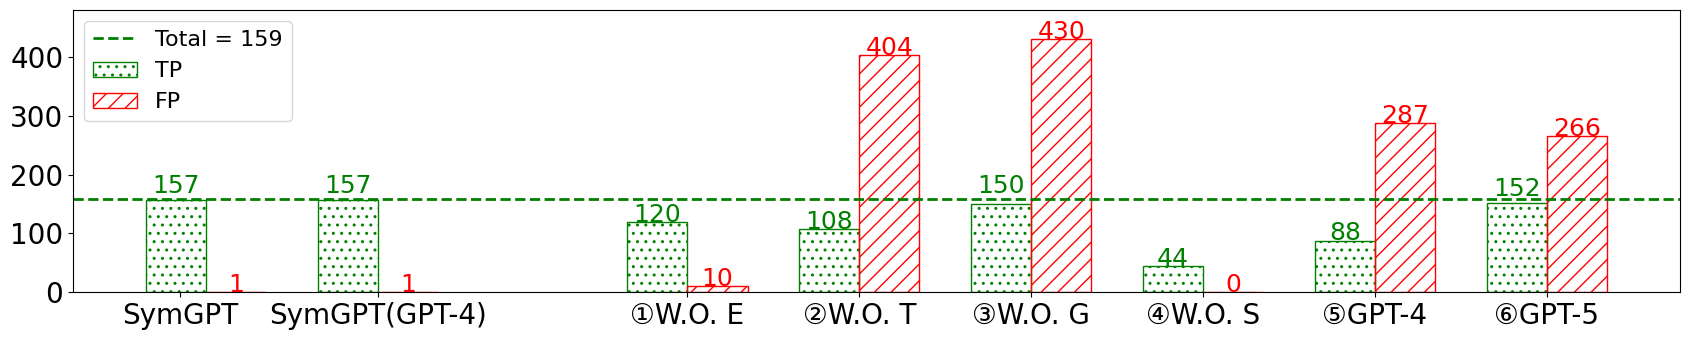

In [20]:
# Example data for 5 bars, each bar combines TP and FN stacked
from matplotlib import pyplot as plt
import numpy as np


# Example data for 5 bars, each bar with TP, FN, FP stacked
labels = ['SymGPT', 'SymGPT(GPT-4)', '①W.O. E', '②W.O. T', '③W.O. G', '④W.O. S', '⑤GPT-4', '⑥GPT-5']
TP = [157, 157, 120, 108, 150, 44, 88, 152]
FP = [1, 1, 10, 404, 430, 0, 287, 266]
FN = [2, 2, 38, 46, 9, 115, 7]
bar_width = 0.35
gap = 0.8  # Adjust this value for the desired gap
x = np.array([xi + (gap if i > 1 else 0) for i, xi in enumerate(range(len(labels)))])

x1 = x + bar_width

fig, ax = plt.subplots(figsize=(17, 3.5))

# Stacked bars: TP + FN + FP
rects1, rects2, rects3 = [], [], []


for i in range(len(labels)):

    r1 = ax.bar(x[i], TP[i], width=bar_width, edgecolor='green', facecolor='none', hatch='..', label='TP' if i == 0 else "")
    # r2 = ax.bar(x[i], FN[i], width=bar_width, bottom=TP[i], edgecolor='orange', facecolor='none', hatch='\\\\\\\\', label='FN' if i == 0 else "")
    r3 = ax.bar(x1[i], FP[i], width=bar_width, edgecolor='red', facecolor='none', hatch='//', label='FP' if i == 0 else "")
    rects1.append(r1)
    # rects2.append(r2)
    rects3.append(r3)


# Line for total TP across all bars
total_TP = 159
ax.axhline(total_TP, color='green', linestyle='--', linewidth=2, label=f'Total = 159')

# Add labels, title, legend

xtick_positions = [x[i] + bar_width/2 for i in range(len(labels))]
xtick_positions[0] -= 0.15
ax.set_xticks(xtick_positions)
ax.set_yticks([0, 100, 200, 300, 400])
ax.set_ylim(0, 480)
ax.set_xticklabels(labels, fontsize=20)
ax.legend(fontsize=16)

# Attach value labels inside each segment
def autolabel(rects, values, color, high_offset=6):
    for rect, val in zip(rects, values):
        height = rect.get_height()
        
        ax.annotate(
            str(val),
            xy=(rect.get_x() + rect.get_width() / 2, height+high_offset),
            xytext=(0, 0),
            textcoords="offset points",
            color=color, 
            fontsize=18,
            ha='center', 
            va='center')

for i in range(len(labels)):
    g_offset = 12
    r_offset = 12
    if i == 4:
        g_offset = 30
    elif i == 0 or i == 1:
        g_offset = 24
    elif i == 7:
        g_offset = 24
    autolabel(rects1[i], [TP[i]], color='green', high_offset=g_offset)
    autolabel(rects3[i], [FP[i]], color='red', high_offset=r_offset)

plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

